# 1) Fair/fake coin example with probability: 0.5Beta(20,3)+0.5Beta(20,3)

In [37]:
import numpy as np
import scipy.special as sps
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def log_odds(c_0, c_1, a1, b1, a2, b2):
    # Total number of tosses
    N = c_0 + c_1
    
    M_fair = (N+1)*np.log(0.5)
    M_fake = np.log(0.5)+0.5*(sps.gammaln(a1+b1) - sps.gammaln(a1) - sps.gammaln(b1) + sps.gammaln(c_0+a1) + sps.gammaln(c_1+b1) - sps.gammaln(N+a1+b1))+0.5*(sps.gammaln(a2+b2) - sps.gammaln(a2) - sps.gammaln(b2) + sps.gammaln(c_0+a2) + sps.gammaln(c_1+b2) - sps.gammaln(N+a2+b2))
    
    return M_fair - M_fake

# Number of Zeros observed
c_0 = 20
# Number of Ones
c_1 = 20

# Prior
a1 = 20
b1 = 3

a2 = 3
b2 = 20

print('log_odds = ', log_odds(c_0, c_1, a1, b1, a2, b2) )

('log_odds = ', 5.5992028539377188)


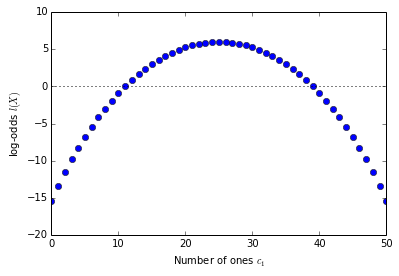

In [32]:
# Prior
a1 = 20
b1 = 3
a2 = 3
b2 = 20

N = 50

l = np.zeros(N+1)

for c in range(0,N+1):
    l[c] = log_odds(N-c, c, a1, b1, a2, b2)

plt.plot(range(0,N+1), l, 'o')
plt.plot(range(0,N+1), np.zeros(N+1), 'k:')
ax = plt.gca()
ax.set_xlabel('Number of ones $c_1$')
ax.set_ylabel('log-odds $l(X)$')
plt.show()

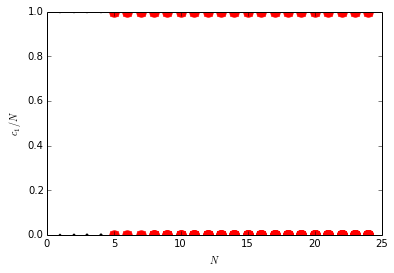

In [36]:
for N in range(1, 25):

    l = np.zeros(N+1)

    for c in range(0,N+1):
        l[c] = log_odds(N-c, c, a1, b1, a2, b2)
    
    
    idx = np.where( np.array(l)<0 )
    p = np.arange(0,N+1)/N
    plt.plot(N*np.ones_like(p), p, '.k',markersize=4)    
    plt.plot(N*np.ones_like(p[idx]), p[idx], '.r',markersize=20)
    

ax = plt.gca()
ax.set_ylim((0,1))
ax.set_xlabel('$N$')
ax.set_ylabel('$c_1/N$')
plt.show()